# Develop a predictive maintenance model using LSTM-RNN to forecast equipment failures, enabling proactive maintenance and reducing downtime.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load your dataset 
data = pd.read_csv('Boston.csv')
data.head()

,sno,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)


In [9]:
# Create sequences and labels for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i : i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10  # Define sequence length
sequences, labels = create_sequences(data_normalized, sequence_length)

In [10]:

# Split the data into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(sequences, labels, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=False)

In [11]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=data.shape[1]))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/20
13/13 [==============================] - 1s 20ms/step - loss: 0.1667 - val_loss: 0.2143
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0779 - val_loss: 0.1007
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0457 - val_loss: 0.0685
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.0516
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0318 - val_loss: 0.0454
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0292 - val_loss: 0.0369
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0270 - val_loss: 0.0343
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.0343
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.0313
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0231 - val_loss: 0.0307
Epoch 11/20
13/13 

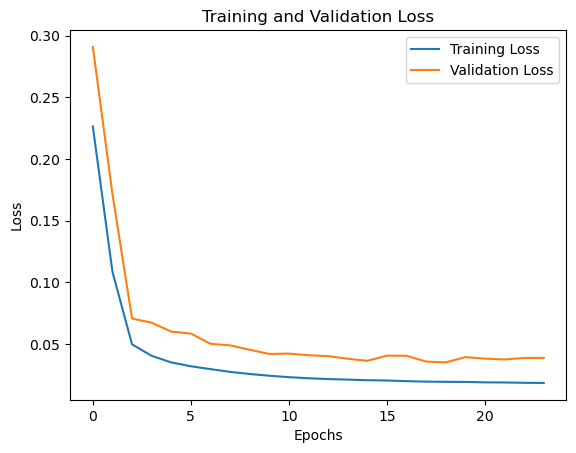

In [6]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2/2 [==============================] - 0s 580us/step


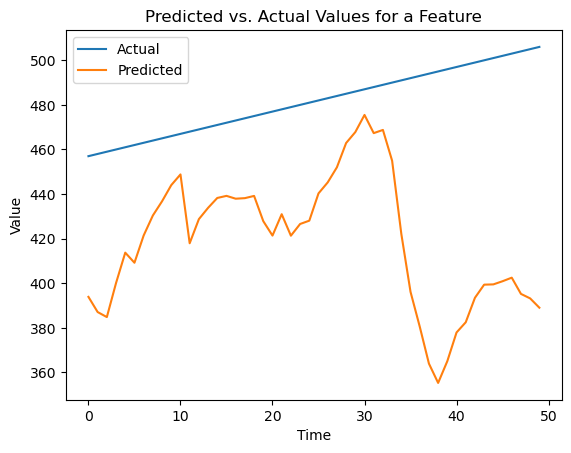

In [7]:
# Predict on the test set
predicted_values = model.predict(X_test)

# Inverse transform the predicted values to original scale
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

# Calculate error or other evaluation metrics if needed

# Visualize predictions vs. actual values (for one feature)
plt.plot(y_test[:, 0], label='Actual')
plt.plot(predicted_values[:, 0], label='Predicted')
plt.title('Predicted vs. Actual Values for a Feature')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


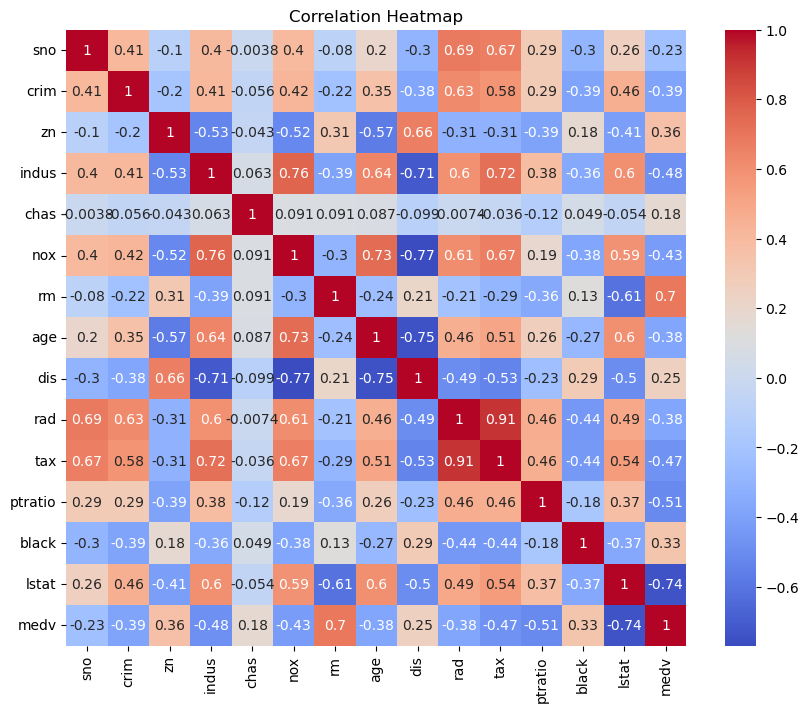

In [8]:
# Calculate correlations between features
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
